<a href="https://colab.research.google.com/github/SteelworkerDB/Sales_Predictions/blob/main/Prediccion_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO PREDICCIÓN DE VENTAS**
---
---
---

# PARTE 1. CARGA DE DATOS Y VISUALIZACIÓN INICIAL

---
---

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #PARA ANALISIS GRAFICO
from matplotlib.patches import Rectangle # PARA LEYENDAS

import seaborn as sns #PARA ESTILOS DE VISUALIZACION

filename="/content/sales_predictions_2023.csv"
vp_df=pd.read_csv(filename)
vp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
vp_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# PARTE 2. LIMPIEZA
---
---

In [78]:
vp_df.isna().sum() #VERIFICAR CUANTOS DATOS ESTÁN EN BLANCO
#HAY 1463 DATOS EN NAN EN Item_Weight y 2410 en Outles_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [79]:
vp_df.info() #PAR VERIFICAR EL TIPO DE DATOS Y EL NÚMERO DE COLUMNAS Y FILAS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 1. ¿CUÁNTAS FILAS Y COLUMNAS HAY?

---



COLUMNAS: 12
FILAS: 8523

## 2. ¿TIPOS DE DATOS DE CADA VARIABLE?

---



In [80]:
vp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 3. ¿DUPLICADOS?

---



In [81]:
vp_df.duplicated().sum() #VERIFICANDO DUPLICADOS

0

## 4. ¿VALORES FALTANTES?

---



In [82]:
vp_df.isna().sum() #VERIFICAR CUANTOS DATOS ESTÁN EN BLANCO
#HAY 1463 DATOS EN NAN EN Item_Weight y 2410 en Outles_Size


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5.  TRATAMIENTO DE VALORES FALTANTES
---




In [83]:
#ANÁLISIS DE DATOS DE COLUMNA Item_Weight
#PARA DECIDIR TRATAMIENTO DE FALTANTES:


# AGRUPO SEGÚN COLUMNA Item_type PARA VERIFICAR SI EXISTEN DIFERENCIAS
# EN LAS DISTRIBUCIONES.
# ADICIONAL OBTENGO EL PROMEDIO TOTAL DE Item_Weight
prom_peso_tipo=vp_df.groupby('Item_Type')['Item_Weight'].mean().reset_index()
std_peso_tipo=vp_df.groupby('Item_Type')['Item_Weight'].std().reset_index()
prom_peso_total=vp_df['Item_Weight'].mean()
print('PROMEDIO DE PESOS POR TIPO\n', prom_peso_tipo)
print()
print('DEVIACIÓN ESTÁNDAR DE PESOS POR TIPO\n',std_peso_tipo)
print()
print('PROMEDIO TOTAL DE Item_Weight\n',prom_peso_total)

PROMEDIO DE PESOS POR TIPO
                 Item_Type  Item_Weight
0            Baking Goods    12.277108
1                  Breads    11.346936
2               Breakfast    12.768202
3                  Canned    12.305705
4                   Dairy    13.426069
5            Frozen Foods    12.867061
6   Fruits and Vegetables    13.224769
7             Hard Drinks    11.400328
8      Health and Hygiene    13.142314
9               Household    13.384736
10                   Meat    12.817344
11                 Others    13.853285
12                Seafood    12.552843
13            Snack Foods    12.987880
14            Soft Drinks    11.847460
15          Starchy Foods    13.690731

DEVIACIÓN ESTÁNDAR DE PESOS POR TIPO
                 Item_Type  Item_Weight
0            Baking Goods     4.773622
1                  Breads     4.440540
2               Breakfast     5.038131
3                  Canned     4.586564
4                   Dairy     4.686532
5            Frozen Foods     4.5073

 **OBSERVACIONES: Las distribuciones parecen ser parecidas.  El promedio total de pesos no se desvía mucho
 de los promedios de peso por tipo de ítem.**

In [84]:
#PARA VISUALIZAR SI EXISTE UNA RELACIÓN ENTRE LOS VALORES FALTANTES
#DE PESO Y LOS VALORES DE OTRA COLUMNA, COMO LA DE Item_Type
#SUMO LA CANTIDAD DE FALTANTES

faltantes_tipo=vp_df.groupby('Item_Type',group_keys=True)['Item_Weight'].apply(lambda x:x.isna().sum())
faltantes_tipo

#ES DIFICIL ENCONTRAR ALGUNA RELACIÓN DE LA INFORMACIÓN OBSERVADA CON LOS
#DATOS FALTANTES,.  LOS FALTANTES PARECEN SER MCAR

Item_Type
Baking Goods             112
Breads                    47
Breakfast                 21
Canned                   110
Dairy                    116
Frozen Foods             138
Fruits and Vegetables    213
Hard Drinks               31
Health and Hygiene        90
Household                151
Meat                      88
Others                    32
Seafood                   13
Snack Foods              212
Soft Drinks               71
Starchy Foods             18
Name: Item_Weight, dtype: int64

**OBSERVACIONES: No parece haber relación entre el tipo de ítem y los valores faltantes de peso.**

**LOS VALORES FALTANTES DE Item_weight PARECEN SER FALTANTES COMPLETAMENTE ALEATORIOS POR LO MENOS AL ANALIZAR LOS VALORES AGRUPADOS DE Item_Type e Item_Weight.**  

**SIN EMBARGO, CADA ITEM TIENE SU PESO ASOCIADO A SU ITEM_IDENTIFIER. ES POSIBLE IMPUTAR LOS VALORES FALTANTES OBSERVANDO LOS VALORES ASOCIADOS CON SU ITEM_IDENTIFIER**


In [85]:
#IMPUTACIÓN: Primero deseamos generar una tabla de consulta que tenga solo
#Item Weight con su Item_Identifier
vp_df_imp=vp_df.copy()
sub_vp_df=vp_df_imp[['Item_Identifier','Item_Weight']]
sub_vp_df.head()

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
2,FDN15,17.50
3,FDX07,19.20
4,NCD19,8.93


In [86]:
#Quitamos los valores faltantes
sub_vp_df=sub_vp_df.dropna()
sub_vp_df.isna().sum()


Item_Identifier    0
Item_Weight        0
dtype: int64

In [87]:
#Generamos una tabla de consulta agrupando por Item_Identifier.
grupo=sub_vp_df.groupby('Item_Identifier')['Item_Weight'].mean().reset_index()

In [88]:
#Revisamos si tenemos todos los códigos o Item Identifiers originales dentro de esta lista
print(grupo.shape) #De la tabla de consulta
print(vp_df_imp['Item_Identifier'].unique().shape)

(1555, 2)
(1559,)


Hay 4 Items (Item_Identifiers) que no tienen asignado un peso, a estos 4 valores faltantes imputaremos más tarde con el promedio total de los pesos.

In [89]:
#Finalmente tenemos una tabla de consulta: grupo que contiene los valores únicos
#de Item_Identifier, y su respectivo Item_Weight
grupo.head()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115


In [90]:
#Imputación según diccionario (uso de método to_dict)
# REF: https://stackoverflow.com/questions/66062262/fill-empty-cells-of-dataframe-with-values-from-other-dataframe
#
dic = grupo.set_index('Item_Identifier')['Item_Weight'].to_dict()
m = vp_df_imp['Item_Weight'].isna() #verifica si es Nan
vp_df_imp.loc[m, 'Item_Weight'] = vp_df_imp['Item_Identifier'].map(dic)

In [91]:
#Imputación de los 4 valores restantes:
mean_w=vp_df_imp['Item_Weight'].dropna().mean() #promedio de valores sin faltantes
vp_df_imp['Item_Weight'].fillna(mean_w,inplace=True)

In [92]:

print(vp_df_imp.isna().sum()) #VERIFICAR CUANTOS DATOS ESTÁN EN BLANCO


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


**SE VERIFICÓ QUE NO HAY FALTANTES EN Item_Weight**

In [93]:
#PARA EL CASO DE LA COLUMNA OUTLET SIZE, EXISTEN TRES POSIBLES VALORES.
#VERIFICO CUÁNTAS VECES SE REPITEN LOS DATOS EN LA COLUMNA PARA
#PLANIFICAR UNA ESTRATEGIA DE IMPUTACIÓN.

vp_df_imp['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 **SIMILAR AL ITEM_WEIGHT, PARA EL CASO DE LA COLUMNA OUTLET SIZE, ES POSIBLE IMPUTAR LOS VALORES FALTANTES OBSERVANDO LOS VALORES ASOCIADOS CON SU OUTLET_IDENTIFIER**

In [94]:
#IMPUTACIÓN: Primero deseamos generar una tabla de consulta que tenga solo
#Outlet_Size con su Outlet_Identifier
sub_vp_df2=vp_df_imp[['Outlet_Identifier','Outlet_Size']]
sub_vp_df2.head()

,Outlet_Identifier,Outlet_Size
0,OUT049,Medium
1,OUT018,Medium
2,OUT049,Medium
3,OUT010,NaN
4,OUT013,High


In [95]:
vp_df_imp['Outlet_Size'].value_counts(dropna=False)


Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [96]:
#Generamos una tabla de consulta agrupando por Item_Identifier.
grupo=sub_vp_df2.groupby('Outlet_Identifier').first().reset_index()

In [97]:
#Cuántos valores únicos de Outlet Identifiers??
pd.unique(vp_df_imp['Outlet_Identifier'])

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [98]:
#Finalmente tenemos una tabla de consulta: grupo que contiene los valores únicos
#de Outlet_Identifier, y su respectivo Outlet Size
grupo.head(10)

,Outlet_Identifier,Outlet_Size
0,OUT010,None
1,OUT013,High
2,OUT017,None
3,OUT018,Medium
4,OUT019,Small
5,OUT027,Medium
6,OUT035,Small
7,OUT045,None
8,OUT046,Small
9,OUT049,Medium


In [99]:
#VERIFICANDO QUE NO HAYA FALTANTES:
print('Faltantes: \n',grupo.isna().sum())
print('Dimension: ', grupo.shape)

Faltantes: 
 Outlet_Identifier    0
Outlet_Size          3
dtype: int64
Dimension:  (10, 2)


* Al parecer existen 3 Outlets (según sus Outlet_Identifiers) a los que no se les ha asignado un tamaño*

In [100]:
#Para verificar que en realidad los valores faltantes se concentran en estos 3
#Outlets podemos llenar los valores con la tabla de consulta:

#Código para llenar valores faltantes del dataframe
#vp_df_imp con valores de la tabla de consulta
vp_df_imp['Outlet_Size'] = vp_df_imp['Outlet_Identifier'] \
               .apply(lambda x: grupo['Outlet_Size'][grupo['Outlet_Identifier'] == x] \
               .values)
vp_df_imp['Outlet_Size']=vp_df_imp['Outlet_Size'].str.get(0) #Esta línea extrae el elemento de la "lista" que retorna el apply de la línea anterior

In [101]:
#Realizamos un conteo de valores
vp_df_imp['Outlet_Size'].value_counts(dropna=False)

Medium    2793
None      2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

*En efecto los 2410 valores vacíos parecen pertenecer únicamente a los Outlets OUT010, OUT017, OUT045.  Para la imputación en la tabla de consulta se selecciona aleatoriamente un tamaño.*

In [102]:
tam_list=['Small', 'Medium', 'High']
#Código para llenar valores faltantes de la tabla de consulta
grupo['Outlet_Size']=grupo['Outlet_Size'].apply(lambda l: l if not 'None' else np.random.choice(tam_list))
#Código para llenar valores faltantes del dataframe
#vp_df_imp con valores de la tabla de consulta
grupo=pd.DataFrame(grupo)
vp_df_imp['Outlet_Size'] = vp_df_imp['Outlet_Identifier'] \
               .apply(lambda x: grupo['Outlet_Size'][grupo['Outlet_Identifier'] == x].values)
vp_df_imp['Outlet_Size']=vp_df_imp['Outlet_Size'].str.get(0) #Esta línea extrae el elemento de la "lista" que retorna el apply de la línea anterior

In [103]:
vp_df_imp['Outlet_Size']=pd.DataFrame(vp_df_imp['Outlet_Size'])
vp_df_imp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,High,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
grupo.head(10)

,Outlet_Identifier,Outlet_Size
0,OUT010,Medium
1,OUT013,High
2,OUT017,High
3,OUT018,High
4,OUT019,Medium
5,OUT027,Small
6,OUT035,Medium
7,OUT045,High
8,OUT046,Medium
9,OUT049,Small


In [105]:

#VERIFICANDO ELIMINACIÓN DE VALORES NONE
vp_df_imp['Outlet_Size'].value_counts()


High      3715
Medium    2943
Small     1865
Name: Outlet_Size, dtype: int64

*Cómo se observa se han eliminado los valores None de Outlet Size*

## 6. VERIFICACIÓN DE QUE NO HAYA VALORES FALTANTES DESPUÉS DE ABORDADOS
---

In [106]:
#VERIFCANDO QUE NO HAY FALTANTES:
vp_df_imp.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7.  ARREGLANDO CATEGORÍA INCONSISTENTE DE DATOS


---



In [107]:
vp_df_imp.groupby('Item_Fat_Content')['Item_Identifier'].count().reset_index()


,Item_Fat_Content,Item_Identifier
0,LF,316
1,Low Fat,5089
2,Regular,2889
3,low fat,112
4,reg,117


OBSERVANDO LOS DATOS LA COLUMNA Item_Fat_Content CONTIENE 3 FORMAS DE INDICAR LOW FAT (Low Fat, LF, low fat) Y 2 FORMAS DE INDICAR REGULAR (reg y Regular)

In [108]:
#PARA RESOLVER LA INCONSISTENCIA, REEMPLAZO LOS VALORES DE reg CON Regular y
#LOS VALORES DE LF con Low Fat.

vp_df_imp['Item_Fat_Content'].replace(['LF','low fat','reg'],
                                        ['Low Fat', 'Low Fat', 'Regular'],
                                      inplace=True)
#VERIFICANDO QUE SE RESOLVIÓ LA INCONSISTENCIA CORRECTAMENTE
vp_df_imp.groupby('Item_Fat_Content')['Item_Identifier'].count().reset_index()


,Item_Fat_Content,Item_Identifier
0,Low Fat,5517
1,Regular,3006


## 8. PARA CADA COLUMNA NUMÉRICA, OBTENER LAS ESTADÍSTICAS RESUMIDAS

---



In [109]:
#SIMPLEMENTE UTILIZANDO LA FUNCIÓN DESCRIBE

vp_df_imp.describe().round(2)



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# PARTE 3 ANÁLISIS ESTADÍSTICO CON GRÁFICOS
---
---






**1**. Generación de un mapa de correlación para identificar variables de interés, en especial, las relacionadas con ventas: ```Item_Outlet_Sales```.

<ipython-input-110-4d08c8b5cda9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=vp_df_imp.corr()


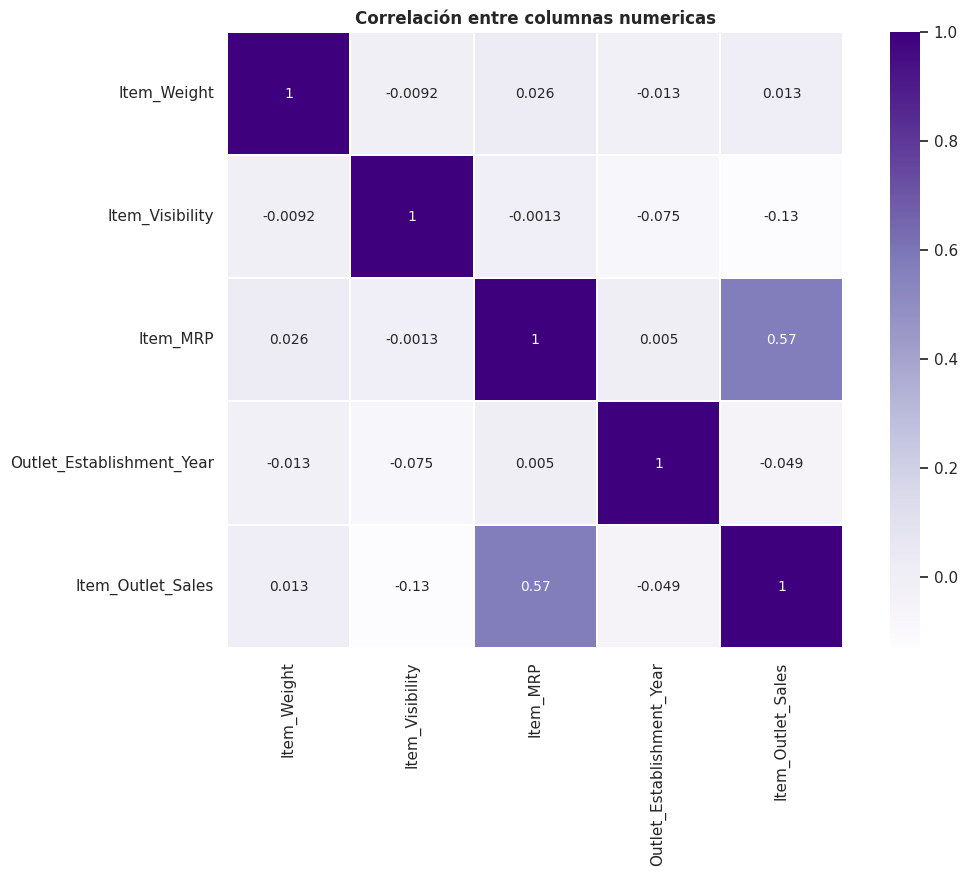

In [110]:
corr=vp_df_imp.corr()
sns.set (rc = {'figure.figsize':(12,8)})
sns.heatmap(corr, cmap='Purples', vmax=1, vmin=-0.13, square=True,
        linewidths=0.1, annot=True, annot_kws={"size":10});
plt.title('Correlación entre columnas numericas',fontweight='bold');


- *A partir de este gráfico se entiende que las ventas Item_Outlet_Sales tienen muy baja correlación con las columnas de tipo numérico, a excepción de la columna del Precio Máximo de Retail MRP, que muestra una correlación moderada de 0.57.  Aunque existe un moderado indicio de que a mayor precio mayores ventas, definitivamente no es suficiente para concluir mucho sobre el comportamiento de las ventas de cada Item.*



---


**2.** Generación de histograma para analizar comportamiento de ventas en relación a columnas no numéricas.

- Es de interés conocer la diferencia en el comportamiento de las ventas ```Item_Outlet_Sales``` por localidad ```Outlet_Location_Type```

In [111]:
# Valores unicos de Outlet_Location_Type
localidades=vp_df_imp['Outlet_Location_Type'].unique()
print(localidades)

['Tier 1' 'Tier 3' 'Tier 2']


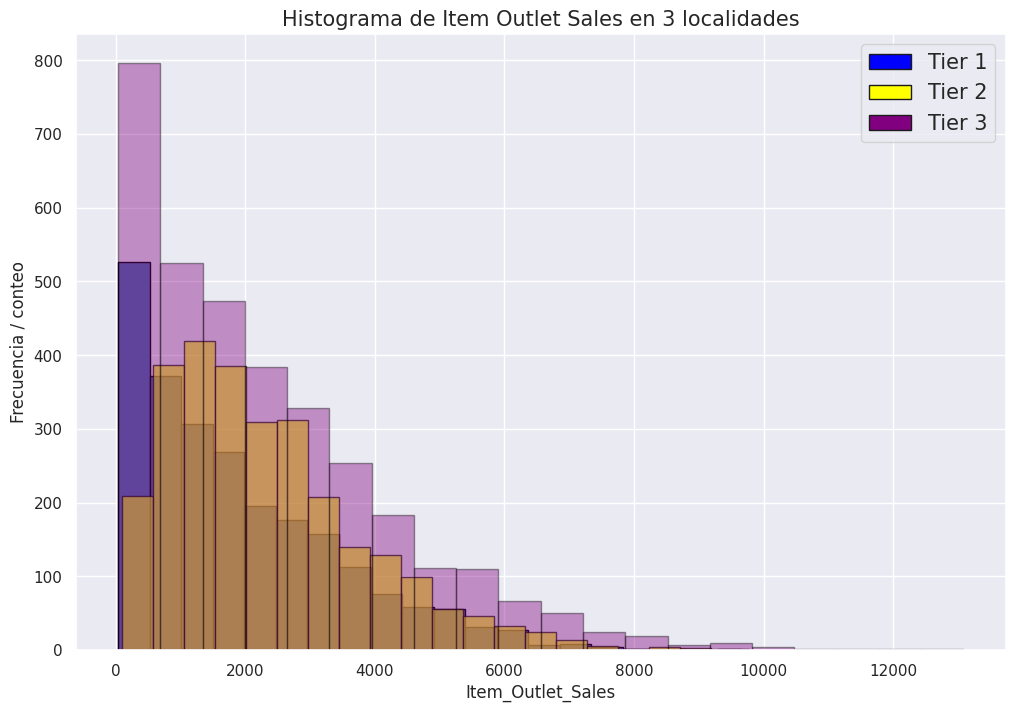

In [112]:
# Hay 3 localidades, se pueden generar tres histogramas para analizar
# el comportamiento de ventas
#FILTRO DE VENTAS TIER 1, TIER 2, TIER 3
filtrov1 = vp_df_imp['Outlet_Location_Type']=='Tier 1'
filtrov2 = vp_df_imp['Outlet_Location_Type']=='Tier 2'
filtrov3 = vp_df_imp['Outlet_Location_Type']=='Tier 3'

ventasT1 = vp_df_imp['Item_Outlet_Sales'][filtrov1]
ventasT2 = vp_df_imp['Item_Outlet_Sales'][filtrov2]
ventasT3 = vp_df_imp['Item_Outlet_Sales'][filtrov3]

#HISTOGRAMA DE VENTAS EN TRES LOCALIDADES

plt.title('Histograma de Item Outlet Sales en 3 localidades',fontsize=15)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frecuencia / conteo',fontsize=12)


pltv1=plt.hist(ventasT1, bins=20, ec='black')
pltv2=plt.hist(ventasT2, bins=20, color='yellow', alpha=0.7, ec='black')
pltv2=plt.hist(ventasT3, bins=20, color='purple', alpha=0.4, ec='black')
#alterar la propiedad alpaha para transparencia
#https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/#:~:text=Matplotlib%20allows%20you%20to%20regulate,such%20as%200.5%20or%200.25.

#PARA CREAR LEYENDA SE ESTABLECE UN COLOR PARA CADA HISTOGRAMA
#https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
col1='blue'
col2='yellow'
col3='purple'

#SE GRABA UN RECTANGULO AMARILLO Y OTRO AZUL EN handles
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [col1,col2,col3]]
#EN labels SE LLAMA A CADA NOMBRE DE HISTOGRAMA
labels= ["Tier 1","Tier 2","Tier 3"]
plt.legend(handles, labels, loc='upper right',fontsize=15)

plt.style.use('fast') #estilo fast de matplotlib

- Del gráfico las ventas Items de las tres localidades definitivamente tienen comportamiento parecido, la forma de las tres distribuciones es muy parecida.  

- Se puede decir que en la localidad ```Tier 3```, existe mayor cantidad de items que se venden a precios ligeramente más bajos que en ```Tier2``` y ```Tier 3```, lo que apunta a que el promedio de ventas resulta menor en esta localidad.



---


**3.** Generación de histograma para verificar tamaño de ventas por
```Outlet_Size```.
- Podría ser interesante verificar si el tamaño de ventas tiene alguna correlación con  la columna de ```Item_Outlet_Sales```.

In [113]:
# Queremos conocer los valores de la columna Outlet_Size
tamanos=vp_df_imp['Outlet_Size'].unique
print(tamanos)


<bound method Series.unique of 0        Small
1         High
2        Small
3       Medium
4         High
         ...  
8518      High
8519      High
8520    Medium
8521      High
8522    Medium
Name: Outlet_Size, Length: 8523, dtype: object>


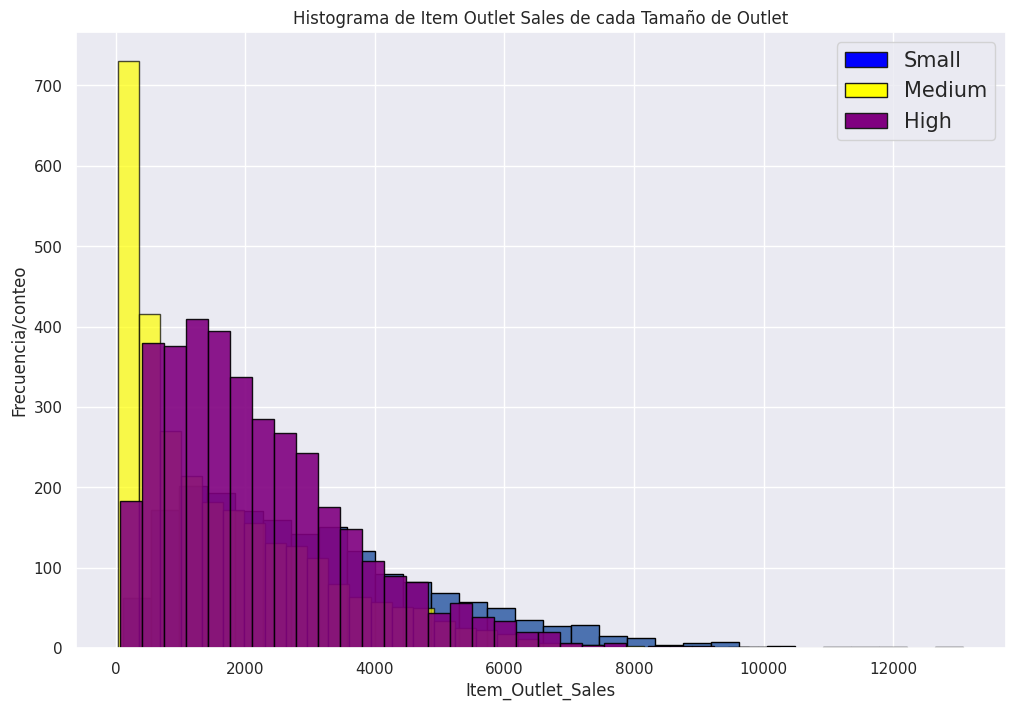

In [114]:
#Filtro de cada tamaño
#FILTRO DE TAMANO SMALL, HIGH, Y MEDIUM

filtroS=vp_df_imp['Outlet_Size']=='Small'
filtroM=vp_df_imp['Outlet_Size']=='Medium'
filtroH=vp_df_imp['Outlet_Size']=='High'

#FILTRAMOS POR VENTA
ventaS=vp_df_imp['Item_Outlet_Sales'][filtroS]
ventaM=vp_df_imp['Item_Outlet_Sales'][filtroM]
ventaH=vp_df_imp['Item_Outlet_Sales'][filtroH]

#HISTOGRAMA DE VENTAS DE ITEMS POR TAMAÑO DE OUTLET

plt.title('Histograma de Item Outlet Sales de cada Tamaño de Outlet')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frecuencia/conteo')

pltT1=plt.hist(ventaS, bins=30, ec='black')
pltT2=plt.hist(ventaM, bins=30, color='yellow', alpha=0.7, ec='black')
pltT3=plt.hist(ventaH, bins=30, color='purple', alpha=0.9, ec='black')

#alterar la propiedad alpaha para transparencia
#https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/#:~:text=Matplotlib%20allows%20you%20to%20regulate,such%20as%200.5%20or%200.25.

#PARA CREAR LEYENDA SE ESTABLECE UN COLOR PARA CADA HISTOGRAMA
#https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
col1='blue'
col2='yellow'
col3='purple'

#SE GRABA UN RECTANGULO AMARILLO Y OTRO AZUL EN handles
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [col1,col2,col3]]
#EN labels SE LLAMA A CADA NOMBRE DE HISTOGRAMA
labels= ["Small","Medium","High"]
plt.legend(handles, labels, loc='upper right',fontsize=15)

plt.style.use('dark_background') #estilo de matplotlib


- Analizando los datos de ventas por ```Outlet_Size```, se observa que una gran cantidad de Items se venden en los Outlets tipo Medium, notablemente más que en los Outlets tipo High.  

- También vemos que para los Outlets tipo Medium, hay una mayor cantidad de Items con ventas ligeramente mayores que en los otros dos tamaños, la forma de su distribución (en amarillo) se encuentra menos sesgada a la derecha que la forma de las otras dos opciones.



---


**4.** Generación de boxplots

- Puede ser interesante conocer la relación entre los precios de los Items que se venden en distintos tipos de supermercado.

In [115]:
#Para obtener cuantos tipos de supermercado existen en los datos:

tipos_Outlet=vp_df_imp['Outlet_Type'].unique()
print(tipos_Outlet)

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


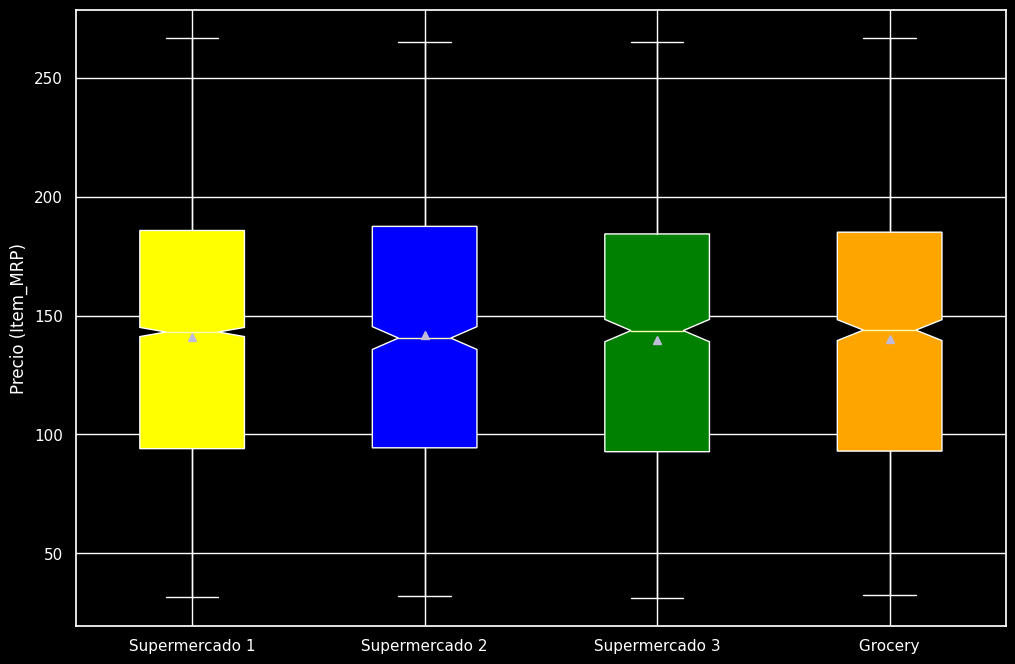

In [116]:
#Vemos que hay cuatro tipos de supermercado

#FILTROS DE POR TIPO DE SUPERMERCADO
filtroS1=vp_df_imp['Outlet_Type']==tipos_Outlet[0]
filtroS2=vp_df_imp['Outlet_Type']==tipos_Outlet[1]
filtroS3=vp_df_imp['Outlet_Type']==tipos_Outlet[3]
filtroG=vp_df_imp['Outlet_Type']==tipos_Outlet[2]

#FILTRADO DE LA COLUMNA DE PRECIOS
precioS1=vp_df_imp['Item_MRP'][filtroS1]
precioS2=vp_df_imp['Item_MRP'][filtroS2]
precioS3=vp_df_imp['Item_MRP'][filtroS3]
precioG=vp_df_imp['Item_MRP'][filtroG]

#BOXPLOTS
bxplt=plt.boxplot([precioS1,precioS2,precioS3,precioG], notch = True, \
             labels=[' Supermercado 1 ', ' Supermercado 2 ', \
                     ' Supermercado 3 ', ' Grocery '], showmeans=True,\
             patch_artist=True);

#CAMBIO DE COLORES DE BOXPLOT
#REF: https://onelinerhub.com/python-matplotlib/how-to-add-legend-to-boxplot
bxplt['boxes'][0].set_facecolor('yellow')
bxplt['boxes'][1].set_facecolor('blue')
bxplt['boxes'][2].set_facecolor('green')
bxplt['boxes'][3].set_facecolor('orange')

plt.ylabel('Precio (Item_MRP)');





- *El comportamiento de ```Item_MRP``` para cada tipo de Supermercado es muy parecido.  El precio promedio de Item es muy similar (señalado por los cuadrados pequeños en gris).*  

- *También se observa que se venden Items de precios similares en las cuatro categorías.*

- *La distribución de precios en cada supermercado casi no tiene sesgo*

# PARTE 4.  VISUALIZACIONES Y TENDENCIAS
---
---

**1.** Tipo de producto vs Ventas
- Es de interés observar qué tipo de producto se ha vendido mejor en general.

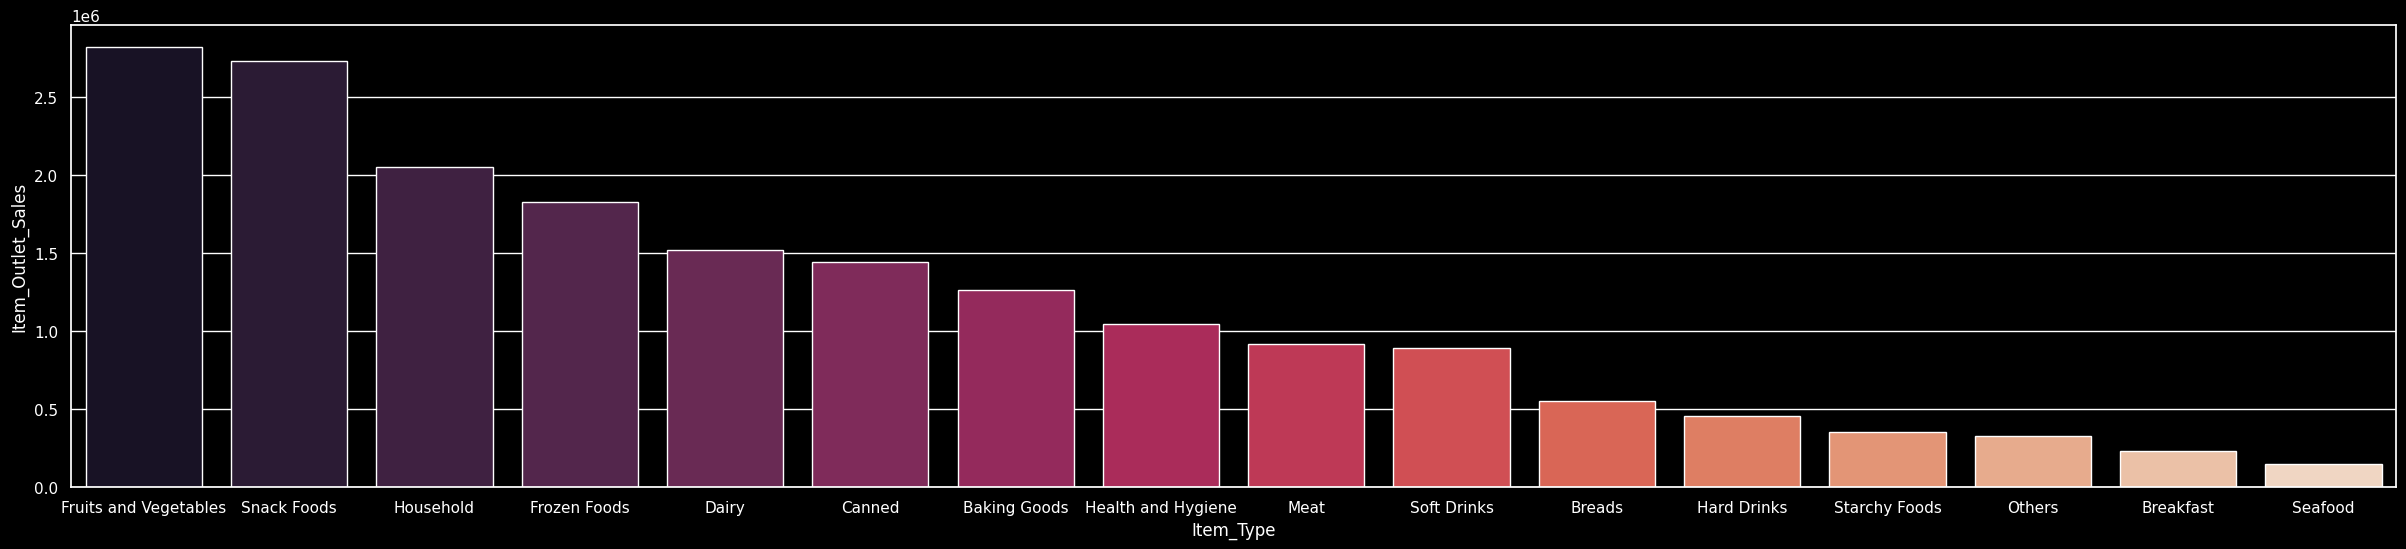

In [117]:
#Suma de ventas agrupados por tipo de producto
venta_por_tipo=vp_df_imp.groupby('Item_Type')['Item_Outlet_Sales'].\
 sum().round(2)

venta_por_tipo.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=[30,6])
sns.set_theme()
sns.barplot(x=venta_por_tipo.index, y=venta_por_tipo, palette="rocket");


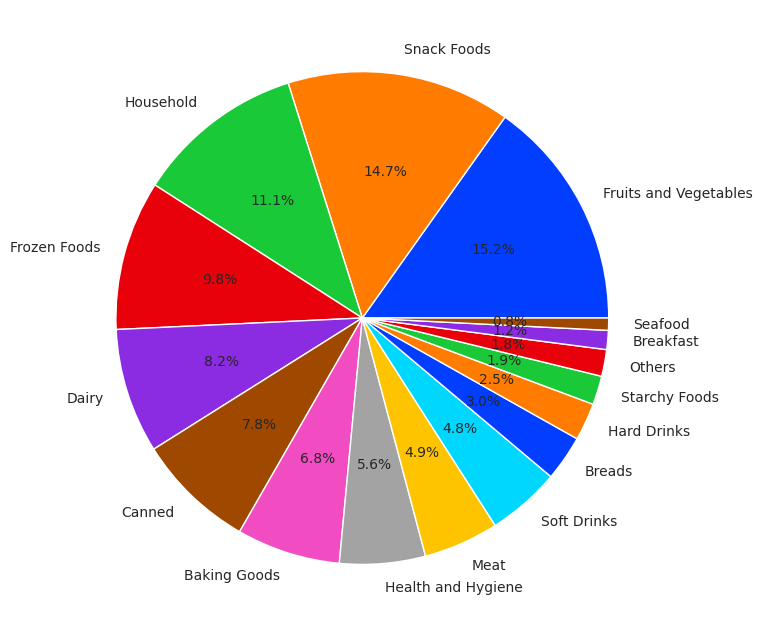

In [118]:
#Posiblemente es mejor visualizarlo en gráfico tipo pie:
fig, ax = plt.subplots()
colores=sns.color_palette('bright') #paleta de colores bright de seaborn
ax.pie(venta_por_tipo, labels=venta_por_tipo.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=colores)
plt.show()

**2.**  Contenido de grasa vs Ventas

- Es de interés analizar el contenido de grasa y ventas de los diferentes items, para entender su relación.

In [119]:
vp_df_fat=vp_df_imp.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index()

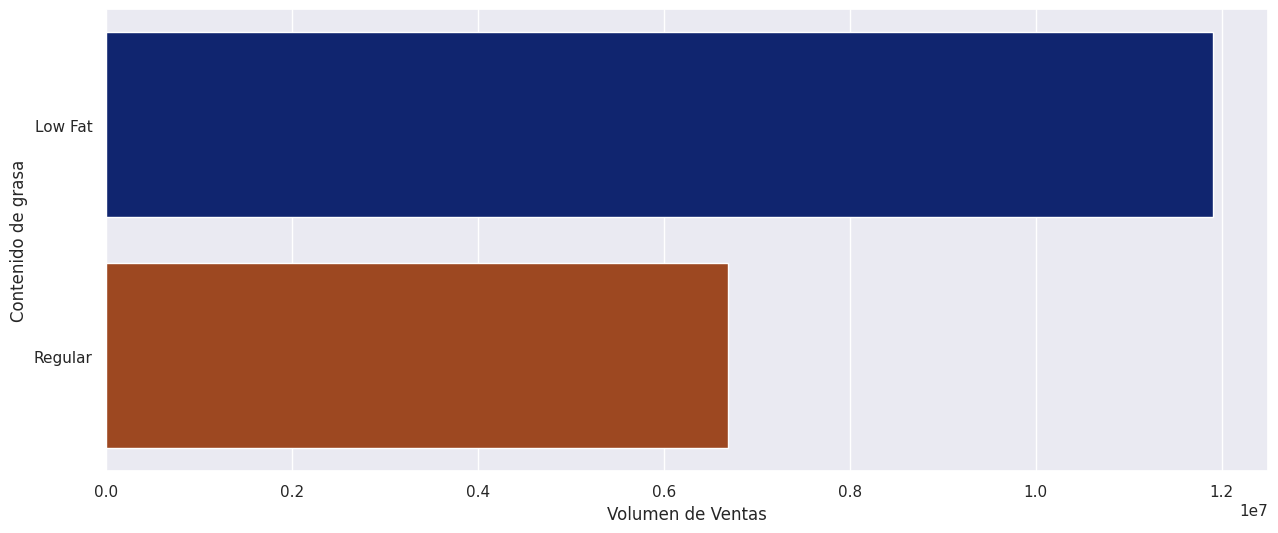

In [120]:
vp_df_fat.sort_values('Item_Outlet_Sales')

fig, ax = plt.subplots(figsize=[15,6])
sns.set_theme()
bar2=sns.barplot(y=vp_df_fat.Item_Fat_Content, \
               x=vp_df_fat.Item_Outlet_Sales, palette="dark")
bar2.set_xlabel('Volumen de Ventas')
bar2.set_ylabel('Contenido de grasa');

- Se venden muchos más productos bajos en grasa

**3.** Visibilidad del producto vs Ventas

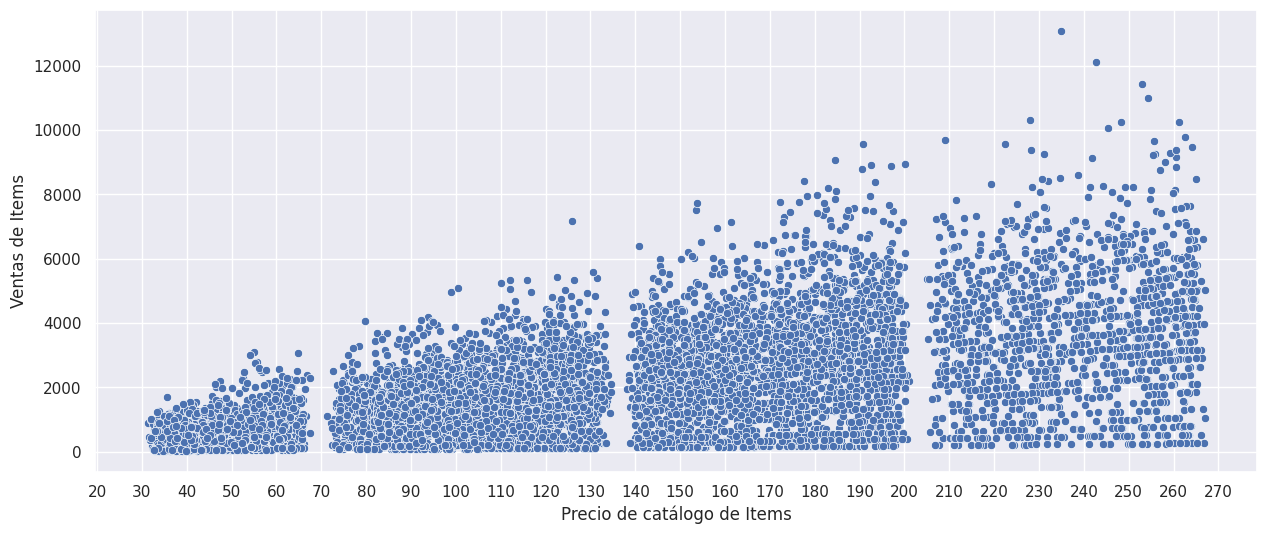

In [121]:
#Para analizar el impacto de la visibilidad de producto vs Ventas se puede utilizar
#un gráfico de dispersión
fig, ax = plt.subplots(figsize=[15,6])
#ax.set_xlim(0,70)
ax.set_xticks(range(0,300,10))
#REF https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn
scat1=sns.scatterplot(data=vp_df_imp, y=vp_df_imp.Item_Outlet_Sales, x=vp_df_imp.Item_MRP)
scat1.set_xlabel('Precio de catálogo de Items')
scat1.set_ylabel('Ventas de Items');

- Claramente es posible agrupar las ventas de cada ítem por grupo de precios.  Los productos se pueden agrupar según precio de 30 a 65, de 70 a 130, de 140 a 200, y de 210 a 265, cada uno con un promedio algo diferente de venta.  Se puede observar que los productos con precio de 210 a 270 alcanzan mayores ventas, compitiendo de cerca con los productos con precios entre 140 y 200.

# PARTE 5.  PREPROCESAMIENTO DE DATOS PARA ML
---
---

In [122]:
#Revisamos el conjunto de datos con el que trabajaremos.  (Imputación y valores faltantes resueltos)
vp_df_imp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.645008,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

- ### Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  


*La columna Item_Identifier contiene el código de los productos, algo que no se relaciona con ninguna característica en particular, por lo que no es relevante para el análisis.  Es necesario removerla del conjunto de datos.*

In [124]:
#Removemos la columna Item_Identifier porque no lo encontramos relevante para el análisis
X = vp_df_imp.drop('Item_Identifier', axis=1)

In [125]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [126]:
#Removemos por columnas, este código permite simplemente comentar la línea
#de la columna que queremos mantener dentro del conjunto.

X.drop('Item_Weight', axis=1, inplace=True)
#X.drop('Item_Fat_Content', axis=1, inplace=True)
#X.drop('Item_Visibility', axis=1, inplace=True)
#X.drop('Item_Type', axis=1, inplace=True)
#X.drop('Item_MRP', axis=1, inplace=True)
X.drop('Outlet_Identifier', axis=1, inplace=True)
X.drop('Outlet_Establishment_Year', axis=1, inplace=True)
#X.drop('Outlet_Size', axis=1, inplace=True)
#X.drop('Outlet_Location_Type', axis=1, inplace=True)
#X.drop('Outlet_Type', axis=1, inplace=True)



Del análisis gráfico vemos que el ```Item_Type``` y el ```Item_MRP``` sí tienen cierto impacto en la predicción de las ventas.  Después de todo, la mayor correlación la tienen el ```Item_MRP``` con ```Item_Outlet_Sales```.
Eliminando ciertas columnas, se ha observado que remover el ```Outlet_Type``` empeora el modelo.  

In [127]:
X.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

- ### Realicen un train test split

In [128]:
# División de la matriz de características y objetivo
X = X.drop('Item_Outlet_Sales', axis=1)
y = vp_df['Item_Outlet_Sales']

#División en matriz de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- ### Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [129]:
# Selectores de columna
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [130]:
#No agregaremos un Imputer ya que se ha imputado manualmente los datos
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


In [131]:
#Instancias de pipelines:

# pipeline numérico
num_pipe = make_pipeline(scaler)

# pipeline categórico
cat_pipe = make_pipeline(ohe);


In [132]:
# Tuplas para Column Transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ef8828f65c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ef8828f49a0>)])

In [133]:
# Ajuste del preprocesador a matriz de entrenamiento
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ef8828f65c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ef8828f49a0>)])

In [134]:
# Aplicando el transformador a las matrices de entrenamiento y prueba

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [135]:
# Comprobación de imputación de los valores faltantes
# escalamiento de datos, codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'Valores faltantes en X_train')
print(np.isnan(X_test_processed).sum().sum(), 'Valores faltantes en X_test')
print('\n')
print('Tipos de datos en X_train: ', X_train_processed.dtype)
print('Tipos de datos en X_test: ', X_test_processed.dtype)
print('\n')
print('Filas x Columnas: ', X_train_processed.shape)
print('\n')
X_train_processed

0 Valores faltantes en X_train
0 Valores faltantes en X_test


Tipos de datos en X_train:  float64
Tipos de datos en X_test:  float64


Filas x Columnas:  (6392, 30)




array([[-0.71277507,  1.82810922,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

# PARTE FINAL.  APLICACIÓN DE MODELOS
---
---

###Modelo de Regresión Lineal
---

In [136]:
from sklearn.linear_model import LinearRegression
# Instancia del modelo de regresión lineal
reg = LinearRegression()

In [137]:
#Ajuste del modelo con los datos de entrenamiento.
reg.fit(X_train_processed,y_train)

LinearRegression()

In [138]:
# Predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

###Evaluación de modelo de regresión lineal
---

In [139]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [140]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print('R2 Entrenamiento: ', r2_train)
print('R2 Prueba: ', r2_test)

R2 Entrenamiento:  0.5608616695405835
R2 Prueba:  0.5665109168289308


Claramente el modelo de regresión lineal es muy malo para lograr los valores de prueba.  R2 tiene un valor negativo muy grande, apunta a que el sesgo es demasiado alto.

In [141]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print('RECM Entrenamiento: ', rmse_train)
print('RECM Prueba: ', rmse_test)

RECM Entrenamiento:  1140.0045776901027
RECM Prueba:  1093.611692961039


In [142]:
print(y_train.mean())
print(y_train.std())

2209.9793571964956
1720.4414464512156


El error en el conjunto de prueba es alto. Si lo comparamos con la desviación estándar y con la media de los valores objetivo de entrenamiento, la raíz del error cuadrático medio representa entre el 50 y 60% del valor medio y de la desviación estándar.

###Modelo Árbol de Decisión
---

In [143]:
from sklearn.tree import DecisionTreeRegressor

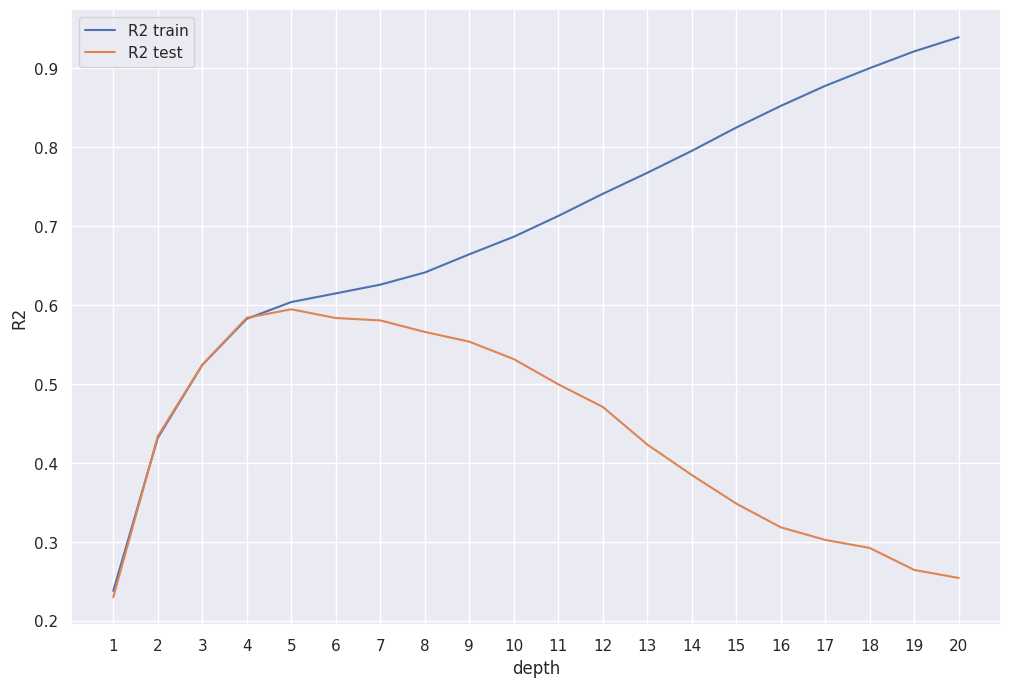

In [144]:
r2_train_list=[]
r2_test_list =[]
for n in range(1,21):
  dec_tree = DecisionTreeRegressor(random_state = 42, max_depth=n)
  dec_tree.fit(X_train_processed, y_train)
  train_preds = dec_tree.predict(X_train_processed)
  test_preds = dec_tree.predict(X_test_processed)
  r2_train = dec_tree.score(X_train_processed, y_train)
  r2_test = dec_tree.score(X_test_processed, y_test)
  r2_train_list.append(r2_train)
  r2_test_list.append(r2_test)


p_train,=plt.plot((range(1,21)), r2_train_list)
p_test,=plt.plot((range(1,21)), r2_test_list)
plt.xlabel('depth')
plt.xticks(range(1,21))
plt.ylabel('R2');
plt.legend([p_train,p_test],["R2 train", "R2 test"]);



In [145]:
#Instancia del modelo de Árbol de Decisión con la mejor profundidad
dec_tree = DecisionTreeRegressor(random_state = 42, max_depth=5)

In [146]:
#Ajuste del modelo al conjunto de entrenamiento
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [147]:
#Predicciones del conjunto de entrenamiento y prueba
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

###Evaluación de modelo de árbol de regresión
---

In [148]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print('R2 Entrenamiento: ', r2_train)
print('R2 Prueba: ', r2_test)

R2 Entrenamiento:  0.6039254897160836
R2 Prueba:  0.5947470502499344


Con una profundidad máxima del árbol de decisión de 5, se obtiene un modelo con sesgo menor y varianza menor que el modelo de regresión lineal según el análisis de R2.  Sin embargo al 60% de predicciones adecuadas, todavía no es un modelo muy confiable.

In [149]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print('RECM Entrenamiento: ', rmse_train)
print('RECM Prueba: ', rmse_test)

RECM Entrenamiento:  1082.6656773340972
RECM Prueba:  1057.3947626960721


El error RECM es menor también en este caso para el modelo de árbol de decisión.

***Se recomienda el modelo de árbol de decisión, presenta menor error, menor sobreajuste y menor subajuste que el modelo de regresión lineal***

#**CONCLUSIONES**

#- LAS CARACTERÍSTICAS NUMÉRICAS NO SON SUFICIENTES PARA CAPTURAR EL COMPORTAMIENTO DE LAS VENTAS.

#- EL MODELO DE ÁRBOL DE DECISIÓN ES EL MÁS ADECUADO PERO NO ES MUY FUERTE CON UN R2 DE 0.59.

#- EL MODELO DE PREDICCIÓN DE VENTAS ES UN BUEN INICIO PARA EL ANÁLISIS DEL COMPORTAMIENTO DE LAS VENTAS, PERO DEBE COMPLEMENTARSE CON UN ANÁLISIS DE OTRAS CARACTERÍSTICAS COMO EL MONTO DE VENTAS POR TIPO, O SI ES LOW FAT, ETC.
